In [2]:
import pandas as pd

In [3]:
#Leyendo los datos desde un archivo Excel.
pd.read_excel("xl/course_participants.xlsx")

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [20]:
#Construyendo el DataFrame desde cero.
#Primero se crean los datos en una lista anidada.
data = [["Mark", 55, "Italy", 4.5, "Europe"], 
        ["John", 33, "USA", 6.7, "America"], 
        ["Tim", 41, "USA", 3.9, "America"], 
        ["Jenny", 12, "Germany", 9.0, "Europe"]]

data

[['Mark', 55, 'Italy', 4.5, 'Europe'],
 ['John', 33, 'USA', 6.7, 'America'],
 ['Tim', 41, 'USA', 3.9, 'America'],
 ['Jenny', 12, 'Germany', 9.0, 'Europe']]

In [21]:
#Luego se crea el DataFrame con data, las etiquetas de las columnas 
# (una lista de nombres) y el índice (una lista de índices). Los índices no
# tienen nombre, pero se les puede asignar uno más adelante.
df = pd.DataFrame(data = data, 
                  columns = ["nombre", "edad", "pais", "puntaje", "continente"], 
                  index = [1001, 1000, 1002, 1003])
df

,nombre,edad,pais,puntaje,continente
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1001 to 1003
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nombre      4 non-null      object 
 1   edad        4 non-null      int64  
 2   pais        4 non-null      object 
 3   puntaje     4 non-null      float64
 4   continente  4 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 192.0+ bytes


### Índices
Las etiquetas de las filas de un DataFrame son llamados **índices**. Si no se asigna un índice significativo, Pandas automáticamente lo creará cuando se construye el DataFrame. Este será un índice entero iniciando en 0.

In [8]:
#Los índices se pueden accesar así.
df.index

Int64Index([1001, 1000, 1002, 1003], dtype='int64')

In [22]:
#Tiene sentido asignarle un nombre a los índices.
df.index.name = "user_id"
df

,nombre,edad,pais,puntaje,continente
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [11]:
#A diferencia de una clave primaria de una base de datos, un índice de un 
# DataFrame puede tener duplicados.
#Si se desea convertir un índice en una columna regular se usa reset_index().
#En este caso Pandas asigna automáticamente un índice con un número 0.
df.reset_index()

,user_id,nombre,edad,pais,puntaje,continente
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [13]:
#Se puede establecer un nuevo índice a partir de las columnas regulares con 
# set_index("nombre_columna")
df.reset_index().set_index("nombre")

,user_id,edad,pais,puntaje,continente
nombre,,,,,
Mark,1001,55,Italy,4.5,Europe
John,1000,33,USA,6.7,America
Tim,1002,41,USA,3.9,America
Jenny,1003,12,Germany,9.0,Europe


In [15]:
#Se puede cambiar el índice.
df.reindex([999, 1000, 1001, 1004]) #Se presenta un alineamiento de datos.
#Si no existe un índice para una fila, esa fila mostrará NaN.

,nombre,edad,pais,puntaje,continente
user_id,,,,,
999,NaN,NaN,NaN,NaN,NaN
1000,John,33.0,USA,6.7,America
1001,Mark,55.0,Italy,4.5,Europe
1004,NaN,NaN,NaN,NaN,NaN


In [16]:
#Ordenando por índice.
df.sort_index()

,nombre,edad,pais,puntaje,continente
user_id,,,,,
1000,John,33,USA,6.7,America
1001,Mark,55,Italy,4.5,Europe
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [19]:
#Ordenando por valores de una o varias columnas.
df.sort_values(["continente", "edad"])

,nombre,edad,pais,puntaje,continente
user_id,,,,,
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe
1001,Mark,55,Italy,4.5,Europe


### Columnas


In [20]:
#Para obtener información de las columnas de un DataFrame se corre lo siguiente:
df.columns

Index(['nombre', 'edad', 'pais', 'puntaje', 'continente'], dtype='object')

In [23]:
#Aunque Pandas le puede asignar números a las columnas esto no es buena idea,
# ya que las columnas representan variables y se deberían nombrar en consecuencia.
#A la lista de los nombres de las columnas se les puede asignar un nombre.
df.columns.name = "propiedades"
df

propiedades,nombre,edad,pais,puntaje,continente
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [24]:
#Las columnas se pueden renombrar con un diccionario.
df.rename(columns={"nombre": "PrimerNombre", "edad": "Edad"})

propiedades,PrimerNombre,Edad,pais,puntaje,continente
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [25]:
#Borrar columnas e índices.
df.drop(columns=["nombre", "pais"], index=[1000, 1003])

propiedades,edad,puntaje,continente
user_id,,,
1001,55,4.5,Europe
1002,41,3.9,America


In [26]:
#Los índices y las columnas son representados ambos por un objeto índice.
# Por eso se pueden intercambiar o transponer.
df.T

user_id,1001,1000,1002,1003
propiedades,,,,
nombre,Mark,John,Tim,Jenny
edad,55,33,41,12
pais,Italy,USA,USA,Germany
puntaje,4.5,6.7,3.9,9.0
continente,Europe,America,America,Europe


In [28]:
#Se puede reordenar el orden de las columnas de un DataFrame.
df.loc[:, ["continente", "pais", "nombre", "edad", "puntaje"]]

propiedades,continente,pais,nombre,edad,puntaje
user_id,,,,,
1001,Europe,Italy,Mark,55,4.5
1000,America,USA,John,33,6.7
1002,America,USA,Tim,41,3.9
1003,Europe,Germany,Jenny,12,9.0


## Manipulación de datos
Normalmente los conjuntos de datos se deben limpiar y organizar antes de usarlos.

### Seleccionando los datos
Inicialmente vamos a accesar los datos por etiquetas y por posición antes de mirar otros métodos, incluyendo la indexación booleana y la selección de datos usando un Índice Múltiple.

#### Seleccionando por etiqueta
La forma más común de tener acceso a los datos de DataFrame es refiriendose a sus etiquetas. Se usa el atributo **loc**, el cual significa **localización**, para especificar cuáles filas y cuáles columnas se quieren recuperar.

In [4]:
df.loc[1001, "nombre"]

'Mark'

In [6]:
#Si se selecciona con un escalar, ya sea en una fila o una columna, se retorna una Series.
df.loc[[1001, 1002], "edad"]

1001    55
1002    41
Name: edad, dtype: int64

In [8]:
type(df.loc[[1001, 1002], "edad"])

pandas.core.series.Series

In [7]:
#Si se seleccionan múltiples filas o columnas se retorna un DataFrame.
df.loc[:1002, ["nombre", "pais"]]

,nombre,pais
1001,Mark,Italy
1000,John,USA
1002,Tim,USA


In [9]:
type(df.loc[:1002, ["nombre", "pais"]])

pandas.core.frame.DataFrame

In [11]:
#Atajo para selección de columnas.
df["pais"] #Retorna una Series.

1001      Italy
1000        USA
1002        USA
1003    Germany
Name: pais, dtype: object

In [13]:
df[["nombre", "pais"]] #Retorna un DataFrame.

,nombre,pais
1001,Mark,Italy
1000,John,USA
1002,Tim,USA
1003,Jenny,Germany


#### Selección por posición

In [5]:
#La selección de un conjunto de DataFrame también por la localización numérica
# con iloc, la cual quiere decir "localización entera".
df.iloc[0, 0] #Produce un escalar.

'Mark'

In [6]:
df.iloc[:, 2] #Produce una Series.

1001      Italy
1000        USA
1002        USA
1003    Germany
Name: pais, dtype: object

In [7]:
df.iloc[:, [2]] #Produce un DataFrame.

,pais
1001,Italy
1000,USA
1002,USA
1003,Germany


In [8]:
type(df.iloc[:, [2]])

pandas.core.frame.DataFrame

#### Selección por indexación booleana
La indexacción booleana se refiere a seleccionar un conjunto de un DataFrame con la ayuda de una Series o un DataFrame cuyos datos consisten de únicamente valores de **True** o **False**.
Las "Series Booleanas" son usadas para seleccionar **columnas y filas específicas** de un DataFrame, mientras que los "DataFrames Booleanos" son usados para seleccionar **valores específicos** a través de todo un DataFrame.
Lo más común es usar la indexación booleana para filtrar las filas de un DataFrame. Piense de esto como si fuese un Autofiltro de Excel. Un ejemplo, podría ser filtrar el DataFrame para que muestre solamente las personas quienes viven en Estados Unidos y tienen edades mayores a 40 años:   

In [9]:
tf = (df["edad"] > 40) & (df["pais"] == "USA")
tf

1001    False
1000    False
1002     True
1003    False
dtype: bool

In [10]:
df.loc[tf, :]

,nombre,edad,pais,puntaje,continente
1002,Tim,41,USA,3.9,America


In [11]:
df.loc[df.index > 1001, :]

,nombre,edad,pais,puntaje,continente
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [12]:
df.loc[df["pais"].isin(["Italy", "Germany"])]

,nombre,edad,pais,puntaje,continente
1001,Mark,55,Italy,4.5,Europe
1003,Jenny,12,Germany,9.0,Europe


In [14]:
#Estos valores pueden ser los volúmenes de lluvia anuales en milímetros.
rainfall = pd.DataFrame(data={"City 1": [300.1, 100.2], 
                              "City 2": [400.3, 300.4], 
                              "City 3": [1000.5, 1100.6]})
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [14]:
rainfall < 400

,City 1,City 2,City 3
0,True,False,False
1,True,True,False


In [15]:
rainfall[rainfall > 400]

,City 1,City 2,City 3
0,NaN,400.3,1000.5
1,NaN,NaN,1100.6


#### Seleccionando con múltiples índices
Una selección con índice múltiple requiere estar ordenada. 

In [18]:
df_multi = df.reset_index().set_index(["continente", "pais"])
df_multi = df_multi.sort_index()
df_multi

index nombre  edad  puntaje
continente pais                                
America    USA       1000   John    33      6.7
           USA       1002    Tim    41      3.9
Europe     Germany   1003  Jenny    12      9.0
           Italy     1001   Mark    55      4.5

In [20]:
df_multi.loc["Europe", :]

,index,nombre,edad,puntaje
pais,,,,
Germany,1003,Jenny,12,9.0
Italy,1001,Mark,55,4.5


In [22]:
#Aplicando índices múltiples:
df_multi.loc[("Europe", "Italy"), :]

,,index,nombre,edad,puntaje
continente,pais,,,,
Europe,Italy,1001,Mark,55,4.5


In [23]:
#Se puede resetear selectivamente parte de un índice múltiple. Cero es la 
# primera columna.
df_multi.reset_index(level=0)

,continente,index,nombre,edad,puntaje
pais,,,,,
USA,America,1000,John,33,6.7
USA,America,1002,Tim,41,3.9
Germany,Europe,1003,Jenny,12,9.0
Italy,Europe,1001,Mark,55,4.5


### Ajustando los datos
La forma más fácil de cambiar los datos de un DataFrame es asignándole valores a ciertos elementos usando los atributos **loc** o **iloc**.

#### Ajustando los datos por etiquetas o por posición
Cuando se asignan valores a un DataFrame por medio de los atributos **loc** o **iloc** se cambian los valores originales del DataFrame. Por ello, usaremos una copia de df con el nombre df2.

In [26]:
#Se copia primero el DataFrame para no tocar los datos originales.
df2 = df.copy()
df2 

,nombre,edad,pais,puntaje,continente
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [27]:
df2.loc[1000, "nombre"] = "JHON"
df2

,nombre,edad,pais,puntaje,continente
1001,Mark,55,Italy,4.5,Europe
1000,JHON,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [29]:
df2.loc[[1000, 1001], "puntaje"] = [3, 4] #iloc funciona en igual forma.
df2

,nombre,edad,pais,puntaje,continente
1001,Mark,55,Italy,4.0,Europe
1000,JHON,33,USA,3.0,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


#### Ajustando los datos con indexación booleana
Supongamos que deseamos volver anónimos todos los nombres de las personas quienes son menores de 20 años o de USA.

In [31]:
tf = (df2["edad"] < 20) | (df2["pais"] == "USA")
df2.loc[tf, "nombre"] = "xxx"
df2

,nombre,edad,pais,puntaje,continente
1001,Mark,55,Italy,4.0,Europe
1000,xxx,33,USA,3.0,America
1002,xxx,41,USA,3.9,America
1003,xxx,12,Germany,9.0,Europe


In [32]:
#Se copia primero el DataFrame para no tocar los datos originales.
rainfall2 = rainfall.copy()
rainfall2

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [33]:
#Se ajusta el valor a cero si los valores están por debajo de 400.
rainfall2[rainfall2 < 400] = 0
rainfall2

,City 1,City 2,City 3
0,0.0,400.3,1000.5
1,0.0,0.0,1100.6


#### Ajustando los datos mediante el reemplazo de valores

In [34]:
df2.replace("USA", "U.S.") #Reemplaza en todo el DataFrame.

,nombre,edad,pais,puntaje,continente
1001,Mark,55,Italy,4.0,Europe
1000,xxx,33,U.S.,3.0,America
1002,xxx,41,U.S.,3.9,America
1003,xxx,12,Germany,9.0,Europe


In [35]:
df2.replace({"pais": {"USA": "U.S."}}) #Reemplza en solo la columna de pais.

,nombre,edad,pais,puntaje,continente
1001,Mark,55,Italy,4.0,Europe
1000,xxx,33,U.S.,3.0,America
1002,xxx,41,U.S.,3.9,America
1003,xxx,12,Germany,9.0,Europe


#### Ajustando los datos adiconando una columna
Se pueden asignar los datos de la nueva columna con escalares o con listas.

In [37]:
df2.loc[:, "descuento"] = 0

In [38]:
df2

,nombre,edad,pais,puntaje,continente,descuento
1001,Mark,55,Italy,4.0,Europe,0
1000,xxx,33,USA,3.0,America,0
1002,xxx,41,USA,3.9,America,0
1003,xxx,12,Germany,9.0,Europe,0


In [39]:
df2.loc[:, "precio"] = [49.9, 48.5, 50.1, 39.3]

In [40]:
df2

,nombre,edad,pais,puntaje,continente,descuento,precio
1001,Mark,55,Italy,4.0,Europe,0,49.9
1000,xxx,33,USA,3.0,America,0,48.5
1002,xxx,41,USA,3.9,America,0,50.1
1003,xxx,12,Germany,9.0,Europe,0,39.3


In [41]:
df2 = df.copy() #Empezamos con una copia fresca.
df2.loc[:, "fecha_nacimiento"] = 2022 - df2["edad"]
df2

,nombre,edad,pais,puntaje,continente,fecha_nacimiento
1001,Mark,55,Italy,4.5,Europe,1967
1000,John,33,USA,6.7,America,1989
1002,Tim,41,USA,3.9,America,1981
1003,Jenny,12,Germany,9.0,Europe,2010


### Datos perdidos
Los datos perdidos pueden ser un problema, ya que tienen el potencial de sesgar los resultados de análisis de datos, por esto haciendo sus conclusiones menos robustas. Pandas utiliza el NumPy **np.nan** para los datos perdidos, desplegado como NaN. **NaN** es el estándar de punto flotante para "No es un Número". Para las estampillas de tiempo se usa en vez **pd.NaT** y para textos perdidos pandas usa **None**.

In [42]:
df2 = df.copy()
df2.loc[1000, "puntaje"] = None
df2.loc[1003, :] = None
df2

,nombre,edad,pais,puntaje,continente
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,NaN,America
1002,Tim,41.0,USA,3.9,America
1003,None,NaN,None,NaN,None


In [43]:
#Para remover filas con datos perdidos.
df2.dropna()

,nombre,edad,pais,puntaje,continente
1001,Mark,55.0,Italy,4.5,Europe
1002,Tim,41.0,USA,3.9,America


In [44]:
df2.dropna(how="all")

,nombre,edad,pais,puntaje,continente
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,NaN,America
1002,Tim,41.0,USA,3.9,America


In [45]:
#Para obtener un DataFrame booleano, dependiendo si hay NaN.
df2.isna() 

,nombre,edad,pais,puntaje,continente
1001,False,False,False,False,False
1000,False,False,False,True,False
1002,False,False,False,False,False
1003,True,True,True,True,True


In [46]:
#Para llenar valores perdidos se usa "fillna()".
df2.fillna({"puntaje": df2["puntaje"].mean()})

,nombre,edad,pais,puntaje,continente
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,4.2,America
1002,Tim,41.0,USA,3.9,America
1003,None,NaN,None,4.2,None


### Datos duplicados


In [47]:
df.drop_duplicates(["pais", "continente"])

,nombre,edad,pais,puntaje,continente
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1003,Jenny,12,Germany,9.0,Europe


In [6]:
#Para encontrar si una columna tiene duplicados:
df["pais"].is_unique #Indica si todos los valores de una columna son únicos.

False

In [8]:
df["pais"].unique() #Lista los valores únicos de una columna.

array(['Italy', 'USA', 'Germany'], dtype=object)

In [11]:
df["pais"].duplicated(keep=False)

1001    False
1000     True
1002     True
1003    False
Name: pais, dtype: bool

In [13]:
#Para obtener todas las filas donde "pais" está duplicado, se usa keep= False.
df.loc[df["pais"].duplicated(keep=False), :]

propiedades,nombre,edad,pais,puntaje,continente
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America


### Operaciones aritméticas
Como los arreglos de NumPy, los DataFrames y las Series hacen uso  de la vectorización.
Para añadir un número a cada valor del DataFrame "rainfall" se hace lo siguiente:

In [16]:
rainfall + 100

,City 1,City 2,City 3
0,400.1,500.3,1100.5
1,200.2,400.4,1200.6


In [17]:
#El poder de pandas está en el mecanismo de "alineamiento de datos".
#Construiremos un nuevo DataFrame de rainfall.
mas_rainfall = pd.DataFrame(data=[[100, 200], [300, 400]], 
                            index=[1, 2], 
                            columns=["City 1", "City 4"])
mas_rainfall

,City 1,City 4
1,100,200
2,300,400


In [18]:
rainfall + mas_rainfall #El alineamiento de datos se hace por el índice.
#Los campos que tienen valores en ambos DataFrames se suman.
#Mientras que los campos que no tienen valores en ambos DataFrames, muestran NaN.

,City 1,City 2,City 3,City 4
0,NaN,NaN,NaN,NaN
1,200.2,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [19]:
#Se puede obtener que los campos que no tienen valores se asuman como cero.
rainfall.add(mas_rainfall, fill_value=0)
#Esto aplica para otras operaciones como: mult, div, pow y sub.

,City 1,City 2,City 3,City 4
0,300.1,400.3,1000.5,NaN
1,200.2,300.4,1100.6,200.0
2,300.0,NaN,NaN,400.0


In [21]:
#Cuando se tiene un DataFrame y una Series en los cálculos, la Series es
# difundida (broadcast) a lo largo del índice.
#Por ejemplo, una Series tomada de una fila:
rainfall.loc[1, :]

City 1     100.2
City 2     300.4
City 3    1100.6
Name: 1, dtype: float64

In [22]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [23]:
rainfall + rainfall.loc[1, :]

,City 1,City 2,City 3
0,400.3,700.7,2101.1
1,200.4,600.8,2201.2


In [24]:
#Una Series tomada de una columna.
rainfall.loc[:, "City 2"]

0    400.3
1    300.4
Name: City 2, dtype: float64

In [25]:
rainfall.add(rainfall.loc[:, "City 2"], axis = 0)

,City 1,City 2,City 3
0,700.4,800.6,1400.8
1,400.6,600.8,1401.0


### Trabajando con columnas de texto
Las columnas con texto o con tipos mezclados son del tipo **objeto**.
Para realizar operaciones sobre columnas con cadenas de texto, se usa el atributo **str** que da acceso a los métodos de cadena de Python.

In [26]:
#Crearemos un nuevo DataFrame
usuarios = pd.DataFrame(data=[" mArk ", "JOHN  ", "Tim", " jenny"], 
                        columns=["nombre"])
usuarios

,nombre
0,mArk
1,JOHN
2,Tim
3,jenny


In [32]:
usuarios_limpios = usuarios.loc[:, "nombre"].str.strip().str.capitalize()
#str.strip() elimina espacios en blanco; str.capitalize() pone la primera letra
# en mayúscula y las demás letras en minúscula.
usuarios_limpios

0     Mark
1     John
2      Tim
3    Jenny
Name: nombre, dtype: object

In [33]:
usuarios_limpios.str.startswith("J")

0    False
1     True
2    False
3     True
Name: nombre, dtype: bool

### Aplicando una función
Los DataFrames ofrecen el método **applymap**, el cual aplicará una función a cada elemento individual, algo que es útil si no hay disponible una función **ufuncs** de NumPy.
Por ejemplo, no hay funciones **ufuncs** para formateo de cadenas, así que podemos formatear cada elemento de un DataFrame de la siguiente forma: 

In [34]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [42]:
def formatea_cadena(x):
    return f"{x:,.2f}"

In [43]:
#Note que la función se pasa sin llamarla.
# Es decir, se escribe formateo_cadena y no formateo_cadena().
rainfall.applymap(formatea_cadena)

,City 1,City 2,City 3
0,300.10,400.30,"1,000.50"
1,100.20,300.40,"1,100.60"


#### Vista Vs. Copia
A veces es confuso si el ajuste de valores se hace una vista o en una copia.
Los ajustes de valores se deberían hacer en el DataFrame original, no en el DataFrame que ha sido rebanado de otro DataFrame.

In [6]:
seleccion = df.loc[:, ["pais", "continente"]].copy()
seleccion
#df.dropna() y df.sort_values("nombre_columna") siempre retornan una copia.

,pais,continente
1001,Italy,Europe
1000,USA,America
1002,USA,America
1003,Germany,Europe


### Combinando DataFrames
La combinación de DataFrames se puede hacer de varias formas. Aquí se mirarán los casos más comunes usando **concat**, **join** y **merge**.

### Concatenación.
**concat** pega DataFrames a lo largo de las filas y alinea las columnas automáticamente.

In [7]:
data = [[15, "France", 4.1, "Becky"], [44, "Canada", 6.1, "Leanne"]]
mas_usuarios = pd.DataFrame(data=data, 
                            columns=["edad", "pais", "puntaje", "nombre"], 
                            index=[1000, 1011])
mas_usuarios

,edad,pais,puntaje,nombre
1000,15,France,4.1,Becky
1011,44,Canada,6.1,Leanne


In [8]:
pd.concat([df, mas_usuarios], axis=0)

,nombre,edad,pais,puntaje,continente
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe
1000,Becky,15,France,4.1,NaN
1011,Leanne,44,Canada,6.1,NaN


In [9]:
#Si se desea alinear los DataFrames por columnas:
data = [[3, 4], [5, 6]]
mas_categorias = pd.DataFrame(data=data, 
                              columns=["quizzes", "logins"], 
                              index=[1000, 2000])
mas_categorias

,quizzes,logins
1000,3,4
2000,5,6


In [10]:
pd.concat([df, mas_categorias], axis=1)
#concat trabaja con múltiples DataFrames, mientras que join y merge solo trabaja
# con dos DataFrames.

,nombre,edad,pais,puntaje,continente,quizzes,logins
1001,Mark,55.0,Italy,4.5,Europe,NaN,NaN
1000,John,33.0,USA,6.7,America,3.0,4.0
1002,Tim,41.0,USA,3.9,America,NaN,NaN
1003,Jenny,12.0,Germany,9.0,Europe,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,5.0,6.0


### Juntando (join) y fusionando (merge)
Cuando se hace una junta (join) de dos DataFrames, se combinan las columnas de cada DataFrame dentro de un nuevo DataFrame, mientras que se decide qué pasa con las filas soportándose en la teoría de conjuntos.
Es el mismo concepto de la cláusula JOIN en una consulta SQL. Hay cuatro tipos de JOIN: inner, left, right y outer.
Con join, pandas usa los índices de ambos DataFrames para alinear las filas. 
Un **inner join** retorna un nuevo DataFrame con solamente esas filas de los dos DataFrames, donde los índices se traslapan o se interseccionan.
Un **left join** toma **todas las filas** del DataFrame de la izquierda, df1, y las alinea con las filas del DataFrame de la derecha, df2, que tengan el mismo índice. En las filas de df2 donde no se encuentre un índice que coincida con los índices de df1 se presentarán dichas filas con valores NaN.  
Un **right join** toma **todas las filas** del DataFrame de la derecha, df2, y las alinea solamente con las filas del DataFrame de la izquierda, df1, que tengan el mismo índice. En las filas de df1 donde no se encuentre un índice que coincida con los índices de df2 se presentarán dichas filas con valores NaN.
Un **outer join**, que significa **junta total externa** toma la unión de todos los índices de ambos DataFrames y acopla los valores de las filas donde estas tengan índices coincidentes.



In [3]:
df1 = pd.DataFrame(data=[[1, 2], [3, 4], [5, 6]], columns=["A", "B"])
df1

,A,B
0,1,2
1,3,4
2,5,6


In [4]:
df2 = pd.DataFrame(data=[[10, 20], [30, 40]], columns=["C", "D"], index=[1, 3])
df2

,C,D
1,10,20
3,30,40


In [5]:
df1.join(df2, how="inner")

,A,B,C,D
1,3,4,10,20


In [6]:
df1.join(df2, how="left")

,A,B,C,D
0,1,2,NaN,NaN
1,3,4,10.0,20.0
2,5,6,NaN,NaN


In [7]:
df1.join(df2, how="right")

,A,B,C,D
1,3.0,4.0,10,20
3,NaN,NaN,30,40


In [8]:
df1.join(df2, how="outer")

,A,B,C,D
0,1.0,2.0,NaN,NaN
1,3.0,4.0,10.0,20.0
2,5.0,6.0,NaN,NaN
3,NaN,NaN,30.0,40.0


**merge** sirve para realizar una unión entre dos DataFrames usando los valores de una o más columnas en vez de basar dicha unión en los índices de los DataFrames. **merge** acepta el argumento **on** para proveer una o más columnas como la **condición de unión**: estas columnas, las cuales tienen que existir en ambos DataFrames, son usadas para acoplar las filas:

In [11]:
#Agrega una columna llamada "categoria" a ambos DataFrames.
df1["categoria"] = ["a", "b", "c"]
df2["categoria"] = ["c", "b"]
df1

,A,B,categoria
0,1,2,a
1,3,4,b
2,5,6,c


In [12]:
df2

,C,D,categoria
1,10,20,c
3,30,40,b


In [13]:
df1.merge(df2, how="left", on="categoria")

,A,B,categoria,C,D
0,1,2,a,NaN,NaN
1,3,4,b,30.0,40.0
2,5,6,c,10.0,20.0


### Estadística Descriptiva y Agregación de Datos
Una forma de darle sentido a grandes conjuntos de datos es calcular un estadístico descriptivo como la suma o la media en todo el conjunto de datos o en un subconjunto significativo.

#### Estadísticos Descriptivos
Los Estadísticos Descriptivos le permiten resumir un conjunto de datos mediante el uso de medidas cuantitativas. Por ejemplo, el número de puntos de datos es un estadístico descriptivo simple. Los promedios como la media, la mediana o la moda son otros ejemplos populares. Los DataFrames y las Series le permiten tener acceso a estadísticos descriptivos convenientemente por medio de métodos como **sum**, **mean** y **count**, para nombrar unos pocos. Por defecto, ellos retornan una Series a lo largo del eje 0 (axis=0), lo cual significa que se obtiene el estadístico de las columnas.

In [15]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [16]:
rainfall.mean()

City 1     200.15
City 2     350.35
City 3    1050.55
dtype: float64

In [18]:
rainfall.mean(axis=1) #Por defecto no se tienen en cuenta los NaN en sum y mean.

0    566.966667
1    500.400000
dtype: float64

#### Agrupamiento
La obtención de un estadístico a través de todas las filas de un DataFrame algunas veces no es suficientemente bueno y se necesita una información más granular, por ejemplo, la media por categoría. A continuación se verá cómo se hace. Si se desea calcular el puntaje promedio del DataFrame df , por continente, primero se agrupan las filas por continente y luego se calcula la media **por grupo**. Se excluyen automáticamente todas las columnas no numéricas.



In [29]:
df.groupby(["continente"]).mean()

propiedades,edad,puntaje
continente,,
America,37.0,5.30
Europe,33.5,6.75


In [30]:
df.groupby(["continente", "pais"]).mean()

propiedades         edad  puntaje
continente pais                  
America    USA      37.0      5.3
Europe     Germany  12.0      9.0
           Italy    55.0      4.5

In [32]:
#Se puede obtener un estadístico con una función definida por el usuario.
seleccion = df.loc[:, ["edad", "puntaje", "continente"]]
seleccion

propiedades,edad,puntaje,continente
user_id,,,
1001,55,4.5,Europe
1000,33,6.7,America
1002,41,3.9,America
1003,12,9.0,Europe


In [35]:
seleccion.groupby(["continente"]).agg(lambda x: x.max() - x.min())

propiedades,edad,puntaje
continente,,
America,8,2.8
Europe,43,4.5


### Pivotando y fundiendo
Una pivot_table de pandas es similar a una tabla pivot de Excel. 


In [36]:
data = [["Oranges", "North", 12.30], 
        ["Apples", "South", 10.55], 
        ["Oranges", "South", 22.00], 
        ["Bananas", "South", 5.90], 
        ["Bananas", "North", 31.30], 
        ["Oranges", "North", 13.10]]
data

[['Oranges', 'North', 12.3],
 ['Apples', 'South', 10.55],
 ['Oranges', 'South', 22.0],
 ['Bananas', 'South', 5.9],
 ['Bananas', 'North', 31.3],
 ['Oranges', 'North', 13.1]]

In [37]:
ventas = pd.DataFrame(data=data, columns=["Fruta", "Region", "Ingresos"])
ventas

,Fruta,Region,Ingresos
0,Oranges,North,12.30
1,Apples,South,10.55
2,Oranges,South,22.00
3,Bananas,South,5.90
4,Bananas,North,31.30
5,Oranges,North,13.10


Para crear una tabla pivot con pandas (pd.pivot_table()), el primer argumento que se debe suministrar es el DataFrame original. Los argumentos segundo y tercero son **index** y **columns**. El argumento **index** define cual columna del DataFrame llegará a ser la etiqueta de la fila, mientras que el argumento **columns** establece las etiquetas de las columnas que se presentarán en la tabla pivot.
El argumento **values** será el agregado dentro de la parte de datos del DataFrame resultante mediante el uso de **aggfunc**, la cual es una función que puede ser provista como una cadena o una función ufunc NumPy. El argumento **margins** corresponde al "Gran Total" de Excel, si se dejan por fuera a **margins** y **margins_name**, el Total de las filas y las columnas no serán mostrados.      

In [41]:
pivot = pd.pivot_table(ventas, index="Fruta", columns="Region", 
                       values="Ingresos", aggfunc="sum", 
                       margins=True, margins_name="Total")
pivot
#Es como el "formato ancho" de R.

Region,North,South,Total
Fruta,,,
Apples,NaN,10.55,10.55
Bananas,31.3,5.90,37.20
Oranges,25.4,22.00,47.40
Total,56.7,38.45,95.15


In [42]:
pivot1 = pd.pivot_table(ventas, index="Region", columns="Fruta", 
                       values="Ingresos", aggfunc="sum", 
                       margins=True, margins_name="Total")
pivot1

Fruta,Apples,Bananas,Oranges,Total
Region,,,,
North,NaN,31.3,25.4,56.70
South,10.55,5.9,22.0,38.45
Total,10.55,37.2,47.4,95.15


In [45]:
#Si lo que se quiere es un solo valor para una combinación de Fruta - Región
# se usa la función melt(). Esta es como lo contrario de pivot.
pd.melt(pivot.iloc[:-1, :-1].reset_index(), id_vars="Fruta", 
                                            value_vars=["North", "South"], 
                                            value_name="Ingresos")
#Es como "el formato largo" de R.

,Fruta,Region,Ingresos
0,Apples,North,NaN
1,Bananas,North,31.30
2,Oranges,North,25.40
3,Apples,South,10.55
4,Bananas,South,5.90
5,Oranges,South,22.00


### Plotting (Graficación)
Mientras que Excel usa el término **charts (gráficos)**, pandas se refiere a ellos como **plots**.
El **plotting** le permite visualizar los hallazgos de su análisis de datos y puede ser el paso más importante de todo el proceso. Para el **plotting** se usará la librería por defecto de pandas que es **Matplotlib**. Luego se usará la librería **Plotly**, una librería más moderna que ofrece una experiencia más interactiva en Jupyter notebooks.

#### Matplotlib
Cuando se llama el método **plot** de un DataFrame, pandas producirá por defecto un plot de Matplotlib.
Para poder usar **Matplotlib** en un Jupiter notebook primero se necesita correr uno de los dos siguientes comandos mágicos: **%matplotlib inline** o **%matplotlib notebook**. Ellos configuran el notebook de forma que los plots pueden ser desplegados en el mismo notebook. El último de los comandos agrega un poco de más interactividad, permitiendo cambiar el tamaño o hacer zoom en el gráfico.   


In [52]:
import numpy as np
%matplotlib widget

In [54]:
#Se crea un DataFrame usando datos creados con NumPy.
#Esto permite apalancarse en los constructores de NumPy.
data = pd.DataFrame(data=np.random.rand(4, 4) * 100000, 
                    index=["Q1", "Q2", "Q3", "Q4"], 
                    columns=["East", "West", "North", "South"])
data.index.name = "Quarters"
data.columns.name = "Region"
data

Region,East,West,North,South
Quarters,,,,
Q1,26078.840044,92965.147142,53824.294418,60869.550134
Q2,80654.661793,99213.656103,84878.558609,57669.250234
Q3,58253.397595,74979.793908,25306.573001,22209.512255
Q4,75222.478345,7834.838624,84503.188551,67798.130196


<AxesSubplot:xlabel='Quarters'>

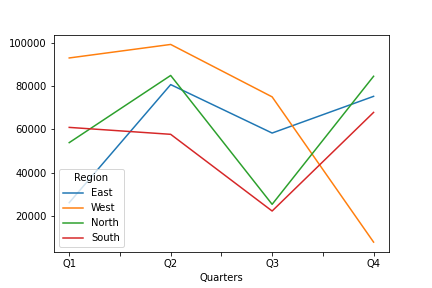

In [55]:
data.plot() #Atajo para data.plot.line()

#### Plotly
Construye gráficos interactivos. Está basado en una librería JavaScript. 

In [57]:
#Ajusta el backend de plotting a Plotly
# De aquí en adelante cuando se escribe plot() se utiliza plotly. 
pd.options.plotting.backend = "plotly"

In [58]:
data.plot()

In [59]:
# Despliga los mismos datos anteriores como un gráfico de barras
data.plot.bar(barmode="group")

### Importando y exportando DataFrames
pandas tiene varios métodos para importar y exportar DataFrames a diferentes formatos:


In [60]:
import_export = pd.DataFrame(data=[["CSV files", "pd.read_csv", "df.to_csv"], 
                                   ["JSON", "pd.read_json", "df.to_json"], 
                                   ["HTML", "pd.read_html", "df.to_html"], 
                                   ["Clipboard", "pd.read_clipboard", "df.to_clipboard"], 
                                   ["Excel files", "pd.read_excel", "df.to_excel"], 
                                   ["SQL Databases", "pd.read_sql", "df.to_sql"]], 
                             columns=["Formato", 
                                      "FuncionImportacionPandas", 
                                      "FuncionExportacionMetodoDataFrame"])
import_export



,Formato,FuncionImportacionPandas,FuncionExportacionMetodoDataFrame
0,CSV files,pd.read_csv,df.to_csv
1,JSON,pd.read_json,df.to_json
2,HTML,pd.read_html,df.to_html
3,Clipboard,pd.read_clipboard,df.to_clipboard
4,Excel files,pd.read_excel,df.to_excel
5,SQL Databases,pd.read_sql,df.to_sql


#### Exportando archivos CSV


In [61]:
df.to_csv("./csv/participantes_curso.csv")

#### Importando archivos CSV


In [62]:
msft = pd.read_csv("csv/MSFT.csv")

In [63]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622 entries, 0 to 8621
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8622 non-null   object 
 1   Open       8622 non-null   float64
 2   High       8622 non-null   float64
 3   Low        8622 non-null   float64
 4   Close      8622 non-null   float64
 5   Adj Close  8622 non-null   float64
 6   Volume     8622 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 471.6+ KB


In [64]:
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062205,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065537,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063871,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062760,47894400


In [65]:
msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8.622000e+03
mean,29.802759,30.125323,29.473685,29.808132,24.921952,6.030722e+07
std,32.131286,32.443821,31.787810,32.135047,31.838096,3.877805e+07
min,0.088542,0.092014,0.088542,0.090278,0.057762,2.304000e+06
25%,3.523438,3.572266,3.486328,3.512695,2.247503,3.651632e+07
50%,26.304999,26.625000,26.000000,26.298437,18.454313,5.350380e+07
75%,34.728749,35.128751,34.250000,34.703752,25.699224,7.397560e+07
max,190.649994,190.699997,186.470001,188.699997,187.663330,1.031789e+09


In [66]:
#La función pd.read_csv() acepta una dirección url.
url = ("https://raw.githubusercontent.com/fzumstein/python-for-excel/1st-edition/csv/MSFT.csv")
msft2 = pd.read_csv(url)
msft2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000,8.622000e+03
mean,29.802759,30.125323,29.473685,29.808132,24.921952,6.030722e+07
std,32.131286,32.443821,31.787810,32.135047,31.838096,3.877805e+07
min,0.088542,0.092014,0.088542,0.090278,0.057762,2.304000e+06
25%,3.523438,3.572266,3.486328,3.512695,2.247503,3.651632e+07
50%,26.304999,26.625000,26.000000,26.298437,18.454313,5.350380e+07
75%,34.728749,35.128751,34.250000,34.703752,25.699224,7.397560e+07
max,190.649994,190.699997,186.470001,188.699997,187.663330,1.031789e+09
